# Data Split 

Our data only has Train and Test. We need to split one of the folder to make a validation folder. Its most likely going to be the test folder that has more images. Lets check how many of each image type we have in our subdirectories

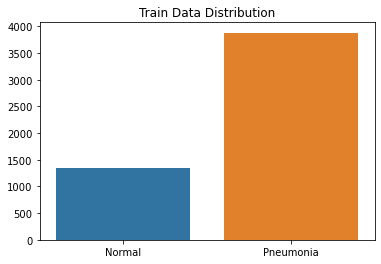

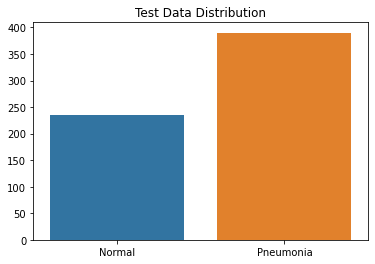

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Identify Test and Train folders

train_folder = "data/chest_xray/train/"
test_folder = "data/chest_xray/test/"

# Count the number of files in each subdirectory
train_normal = len(os.listdir(os.path.join(train_folder, "NORMAL")))
train_pneu = len(os.listdir(os.path.join(train_folder, "PNEUMONIA")))
test_normal = len(os.listdir(os.path.join(test_folder, "NORMAL")))
test_pneu = len(os.listdir(os.path.join(test_folder, "PNEUMONIA")))

# Create a bar plot
sns.barplot(x=["Normal", "Pneumonia"], y=[train_normal, train_pneu])
plt.title('Train Data Distribution')
plt.show()

sns.barplot(x=["Normal", "Pneumonia"], y=[test_normal, test_pneu])
plt.title('Test Data Distribution')
plt.show()


Lets make our validation folder have more pneumonia on purpose so we can balance our train set. We can take 10% of the normal and 30% of the pneumonia

In [3]:
import os
import shutil
import random

# Identify Train and Validation folders
train_folder = "data/chest_xray/train/"
validation_folder = "data/chest_xray/validation/"

# Create validation folder if it doesn't exist
os.makedirs(validation_folder, exist_ok=True)

# Define the subdirectories
subdirectories = ["NORMAL", "PNEUMONIA"]

# Define the number of images to move to validation for each subdirectory
val_images_per_class = 100

# Loop through each subdirectory
for subdirectory in subdirectories:
    # Get the list of files in the subdirectory
    files = os.listdir(os.path.join(train_folder, subdirectory))
    
    # Ensure that the number of validation images doesn't exceed the total number of images in the subdirectory
    val_size = min(val_images_per_class, len(files))
    
    # Select a random subset for validation
    val_files = random.sample(files, val_size)
    
    # Move files to the validation folder
    for file in val_files:
        src_path = os.path.join(train_folder, subdirectory, file)
        dest_path = os.path.join(validation_folder, subdirectory, file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

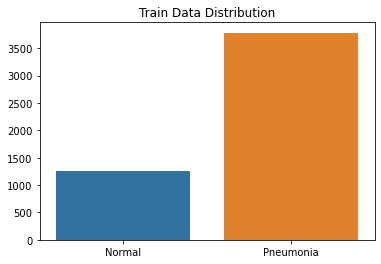

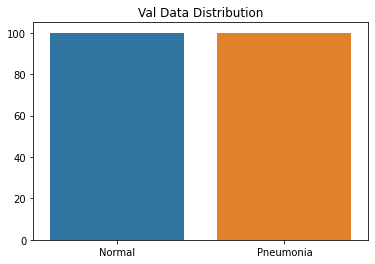

In [4]:
import os
import seaborn as sns 
import matplotlib.pyplot as plt
# Identify Train and validation folders

train_folder = "data/chest_xray/train/"
validation_folder = "data/chest_xray/validation"

# Count the number of files in each subdirectory
train_normal = len(os.listdir(os.path.join(train_folder, "NORMAL")))
train_pneu = len(os.listdir(os.path.join(train_folder, "PNEUMONIA")))

val_normal = len(os.listdir(os.path.join(validation_folder, "NORMAL")))
val_pneu = len(os.listdir(os.path.join(validation_folder, "PNEUMONIA")))


# Create a bar plot
sns.barplot(x=["Normal", "Pneumonia"], y=[train_normal, train_pneu])
plt.title('Train Data Distribution')
plt.show()

sns.barplot(x=["Normal", "Pneumonia"], y=[val_normal, val_pneu])
plt.title('Val Data Distribution')
plt.show()

In [6]:
import os

data_path = "data/chest_xray/"
data_path

# Specificy paths for train, test, val
train_folder = os.path.join(data_path, 'train/')
test_folder = os.path.join(data_path, 'test/')
val_folder = os.path.join(data_path, 'validation/')

# Specify paths for labels
train_normal = os.path.join(train_folder, 'NORMAL')
train_pneumonia = os.path.join(train_folder, 'PNEUMONIA')
test_normal = os.path.join(test_folder, "NORMAL")
test_pneumonia = os.path.join(test_folder, "PNEUMONIA")
val_normal = os.path.join(val_folder, "NORMAL")
val_pneumonia = os.path.join(val_folder, "PNEUMONIA")

print('There are', len(os.listdir(train_normal)), 'normal images in the training set')
print('There are', len(os.listdir(train_pneumonia)), 'pneumonia images in the training set')
print("________________________________________________________________________________________")
print('There are', len(os.listdir(test_normal)), 'normal images in the testing set')
print('There are', len(os.listdir(test_pneumonia)), 'pneumonia images in the testing set')
print("________________________________________________________________________________________")
print('There are', len(os.listdir(val_normal)), 'normal images in the validation set')
print('There are', len(os.listdir(val_pneumonia)), 'pneumonia images in the validation set')

There are 1249 normal images in the training set
There are 3783 pneumonia images in the training set
________________________________________________________________________________________
There are 235 normal images in the testing set
There are 390 pneumonia images in the testing set
________________________________________________________________________________________
There are 100 normal images in the validation set
There are 100 pneumonia images in the validation set
